## COMP 6934 Winter 2025 In class Work 9

Boxplot, histograms and normal curves.

The dataset is the same as problem set 2 through 6, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

But I've improved the data set by removing the strange degree symbols in the column names. Get the improved data set weather.zip

If the numpy / scipy library is not aleady installed, you may need to install it.

## Problem Set 9


Reduce the NL weather set to valid temperature data as done in note9.ipynb. 

* Add a new categorical variable/column called 'Season' to the dataframe that re-codes the Date/Time values into four values:
    * SUMMER
    * WINTER
    * SPRING
    * FALL
* A season value should correspond to approximately 92 days or 3 months of the year. You can use the solstice and equinox dates to define seasons, or some other reasonable definition of seasons.


### Problem 9.1

Plot four parallel boxplots of the temperature, one plot for each season.


In [15]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df= pd.read_csv('Data/NL_weather.csv',low_memory=False)
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-22,2022,7,22,NaN,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,M,NaN,M
1,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-23,2022,7,23,NaN,19.9,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,41.0,NaN
2,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-24,2022,7,24,NaN,17.8,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,47.0,NaN
3,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-25,2022,7,25,NaN,18.7,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,53.0,NaN
4,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-26,2022,7,26,NaN,18.4,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,58.0,NaN


In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [4]:
df_temp = df[["Date/Time", "Mean Temp (C)"]]
df_temp = df_temp.dropna()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89733 entries, 1 to 99656
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date/Time      89733 non-null  datetime64[ns]
 1   Mean Temp (C)  89733 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 MB


In [5]:
# Create a new column for the month
df_temp['Month'] = df_temp['Date/Time'].dt.month

In [8]:
# Define conditions for each season
conditions = [
    (df_temp['Month'] == 12) | (df_temp['Month'] <= 2),  # December, January, February
    (df_temp['Month'] >= 3) & (df_temp['Month'] <= 5),   # March, April, May
    (df_temp['Month'] >= 6) & (df_temp['Month'] <= 8),   # June, July, August
    (df_temp['Month'] >= 9) & (df_temp['Month'] <= 11)   # September, October, November
]

In [9]:
# Define the corresponding season labels
season_labels = ['WINTER', 'SPRING', 'SUMMER', 'FALL']

In [10]:
# Use np.select to assign the season based on the conditions
df_temp['Season'] = np.select(conditions, season_labels)


In [11]:
df_temp.head()

,Date/Time,Mean Temp (C),Month,Season
1,2022-07-23,17.9,7,SUMMER
2,2022-07-24,16.7,7,SUMMER
3,2022-07-25,17.4,7,SUMMER
4,2022-07-26,17.3,7,SUMMER
5,2022-07-27,16.8,7,SUMMER
...,...,...,...,...
96,2022-10-26,13.1,10,FALL
97,2022-10-27,15.4,10,FALL
98,2022-10-28,9.7,10,FALL
99,2022-10-29,8.6,10,FALL


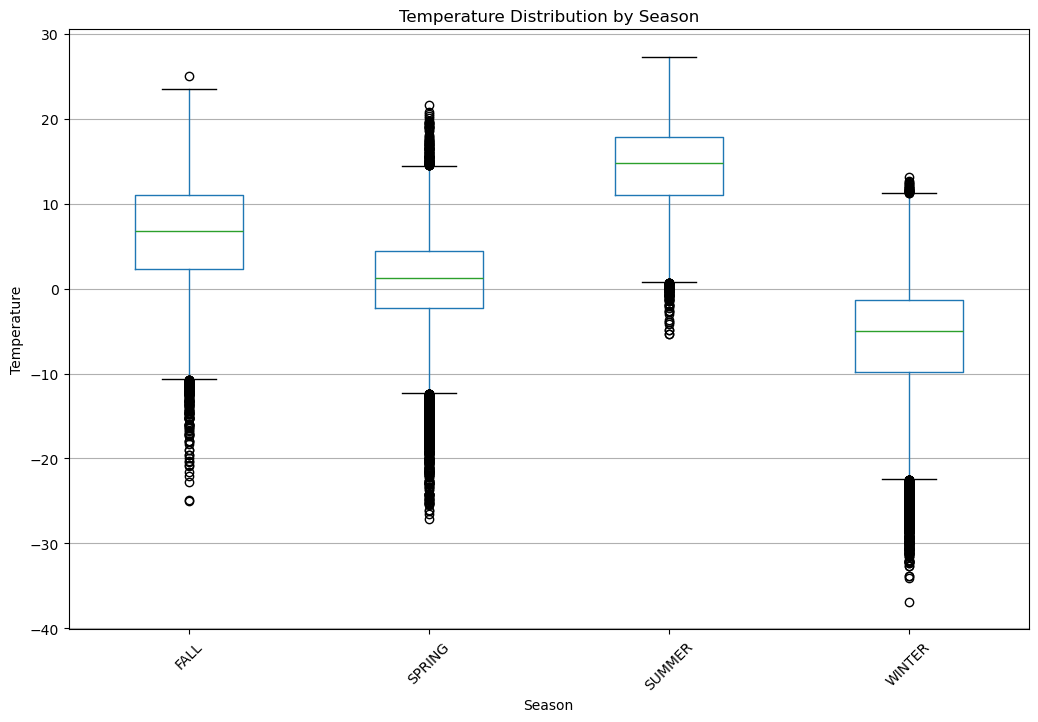

In [36]:
# Plotting parallel boxplots for each season using pandas
fig, ax = plt.subplots(figsize=(12, 8))

df_temp.boxplot(column='Mean Temp (C)', by='Season', ax=ax, grid=False)

ax.set_title('Temperature Distribution by Season')
ax.set_xlabel('Season') # Use set_xlabel to set the x-axis label
ax.set_ylabel('Temperature') # Use set_ylabel to set the y-axis label
ax.tick_params(axis='x', rotation=45) # Rotate x-axis tick labels using tick_params
ax.grid(axis='y')

# Remove the default title generated by pandas boxplot
plt.suptitle('')  # Removes the default title

plt.show() 

### Problem 9.2

Research how to plot a *stacked histogram* in matplotlib. Plot a histogram bar-chart of temperatures, stacking the counts for each season.

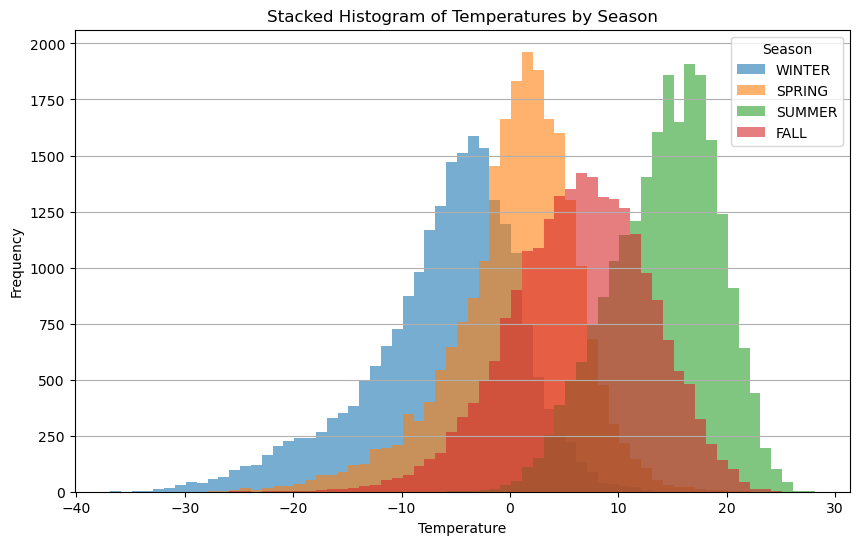

In [37]:
# Plotting a stacked histogram
plt.figure(figsize=(10, 6))

# Create bins for the histogram
bins = np.arange(df_temp['Mean Temp (C)'].min(), df_temp['Mean Temp (C)'].max() + 1, 1)

# Plot the histogram for each season
for season in season_labels:
    plt.hist(df_temp[df_temp['Season'] == season]['Mean Temp (C)'], 
             bins=bins, 
             alpha=0.6, 
             label=season, 
             stacked=True)

# Adding titles and labels
plt.title('Stacked Histogram of Temperatures by Season')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Season')
plt.grid(axis='y')

# Show the plot
plt.show()


### Problem 9.3

Repeat the plot from 9.2 but overlay the histogram with a normal curve. Note this is not a standard normal curve, but a normal curve with the same mean and standard deviation as the temperature data. 

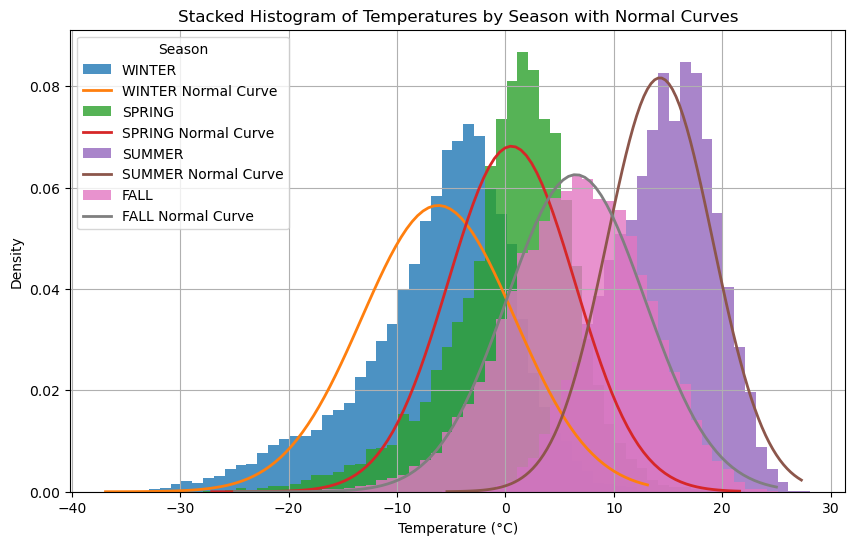

In [20]:
plt.figure(figsize=(10, 6))

# Create bins for the histogram
bins = np.arange(df_temp['Mean Temp (C)'].min(), df_temp['Mean Temp (C)'].max() + 1, 1)

# Plot the histogram for each season and overlay the normal curve
for season in season_labels:
    # Get the data for the season
    season_data = df_temp[df_temp['Season'] == season]['Mean Temp (C)']
    
    # Plot the histogram for the season
    plt.hist(season_data, bins=bins, alpha=0.8, label=season, stacked=True, density=True)

    # Calculate the mean and standard deviation for the season data
    mean_temp = season_data.mean()
    std_temp = season_data.std()

    # Generate a normal distribution curve with the same mean and std
    x_values = np.linspace(season_data.min(), season_data.max(), 100)
    y_values = norm.pdf(x_values, mean_temp, std_temp)
    
    # Overlay the normal curve on the histogram
    plt.plot(x_values, y_values, label=f'{season} Normal Curve', linewidth=2, alpha=1)

# Adding titles and labels
plt.title('Stacked Histogram of Temperatures by Season with Normal Curves')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend(title='Season')
plt.grid(True)

# Show the plot
plt.show()


# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |